In [269]:
import requests as req
import pandas as pd
import numpy as np
import time 
import re 
import json
from collections import defaultdict
from itertools import chain
from pandas.io.json import json_normalize

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [60]:
#Steam calls take this form:
#....http://api.steampoered.com/<interface name>/<method name>/v<version>/?key=<api key>&format=<format>
#.....mys steamid...STEAM_1:0:25686554

key = ""

Get_User_stats_For_Game_URL = "http://api.steampowered.com/ISteamUserStats/GetUserStatsForGame/v0002/?appid=730&"

my_stats = req.get(Get_User_stats_For_Game_URL + "key=" + key + "&steamid=76561198011638836&format=json").json()
#ard_stats = req.get(Get_User_stats_For_Game_URL + "key=" + key + "&steamid=76561198088850704&format=json").json()
con_stats = req.get(Get_User_stats_For_Game_URL + "key=" + key + "&steamid=76561198066576807&format=json").json()

In [63]:
#print(json.dumps(my_stats, indent=4))
#ard_stats = req.get(Get_User_stats_For_Game_URL + "key=" + key + "&steamid=76561198088850704&format=json").json()

In [194]:
len(my_stats['playerstats']['stats'])
#url = (Get_User_stats_For_Game_URL + "key=" + key + "&steamid=76561198088850704&format=json")
#print(url)

http://api.steampowered.com/ISteamUserStats/GetUserStatsForGame/v0002/?appid=730&key=7503B37DD0DD0856563AB3F79C016916&steamid=76561198088850704&format=json


In [171]:
jared_stat_dict_list = []
stats_names = []
j_stats_values = []
for i in range(182):
    stat_names = (my_stats['playerstats']['stats'][i]['name'])
    stat_values = (my_stats['playerstats']['stats'][i]['value'])
    stat_zipper = {stat_names : stat_values}
    jared_stat_dict_list.append(stat_zipper)
    stats_names.append(stat_names)
    j_stats_values.append(stat_values)

In [109]:
conor_stat_dict_list = []
c_stats_names = []
c_stats_values = []
conors_stats = []
for i in range(182):
    stat_names = (con_stats['playerstats']['stats'][i]['name'])
    stat_values = (con_stats['playerstats']['stats'][i]['value'])
    stat_dict = {stat_names : stat_values}
    conor_stat_dict_list.append(stat_dict)
    c_stats_names.append(stat_names)
    c_stats_values.append(stat_values)

In [135]:
conors_dict_stat = conor_stat_dict_list[0:181]
len(conors_dict_stat)

181

In [136]:
jareds_dict_stat = jared_stat_dict_list[0:181]
len(jareds_dict_stat)

181

In [142]:
gah = list(zip(jareds_dict_stat, conors_dict_stat))


In [176]:
jared_df = json_normalize(my_stats['playerstats']['stats'])

In [184]:
jared_df.set_index('name')
jared_df.columns = ['statistic', 'jared']

In [180]:
conor_df = json_normalize(con_stats['playerstats']['stats'])

In [185]:
conor_df.set_index('name')
conor_df.columns = ['statistic', 'conor']

In [346]:
#conor_df.set_index('statistic')
#jared_df.set_index('statistic')

In [345]:
df = jared_df.merge(conor_df, how='inner', on='statistic')
#df

In [219]:
df_stats_index = df.set_index('statistic')

In [236]:
df_stats_index.sort_index(inplace=True)

In [248]:
df_player_index = df_stats_index.T

In [347]:
df_player_index.index.names = ['name']
#df_player_index

In [285]:
list(df_player_index.columns)

['GI.lesson.Csgo_cycle_weapons_kb',
 'GI.lesson.bomb_sites_A',
 'GI.lesson.bomb_sites_B',
 'GI.lesson.csgo_instr_explain_bomb_carrier',
 'GI.lesson.csgo_instr_explain_buyarmor',
 'GI.lesson.csgo_instr_explain_buymenu',
 'GI.lesson.csgo_instr_explain_follow_bomber',
 'GI.lesson.csgo_instr_explain_inspect',
 'GI.lesson.csgo_instr_explain_pickup_bomb',
 'GI.lesson.csgo_instr_explain_plant_bomb',
 'GI.lesson.csgo_instr_explain_prevent_bomb_pickup',
 'GI.lesson.csgo_instr_explain_reload',
 'GI.lesson.csgo_instr_explain_zoom',
 'GI.lesson.csgo_instr_rescue_zone',
 'GI.lesson.defuse_planted_bomb',
 'GI.lesson.find_planted_bomb',
 'GI.lesson.tr_explain_plant_bomb',
 'GI.lesson.version_number',
 'last_match_contribution_score',
 'last_match_ct_wins',
 'last_match_damage',
 'last_match_deaths',
 'last_match_dominations',
 'last_match_favweapon_hits',
 'last_match_favweapon_id',
 'last_match_favweapon_kills',
 'last_match_favweapon_shots',
 'last_match_gg_contribution_score',
 'last_match_kills',

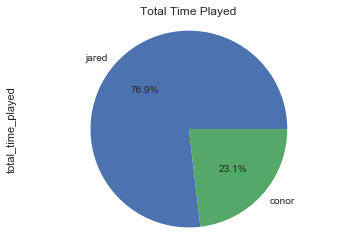

In [321]:
df_player_index['total_time_played'].plot.pie(autopct="%1.1f%%")
plt.title('Total Time Played')
plt.axis('equal')
plt.show()

In [311]:
jareds_map_wins = np.array(df_player_index.loc[ 'jared', 'total_wins_map_ar_baggage' : 'total_wins_map_de_train'])

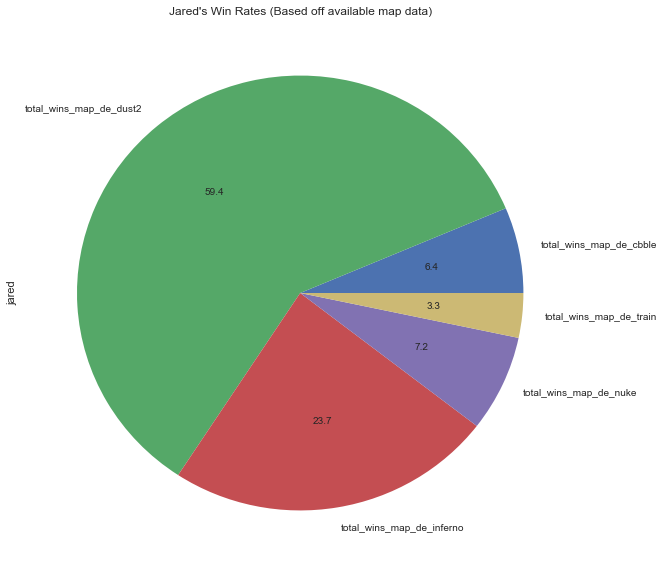

In [325]:
df_player_index.loc[ 'jared',  ['total_wins_map_de_cbble','total_wins_map_de_dust2', 
                    'total_wins_map_de_inferno',
                    'total_wins_map_de_nuke',
                    'total_wins_map_de_train']].plot.pie(autopct="%1.1f", figsize=(10, 10))
plt.title("Jared's Win Rates (Based off available map data)")

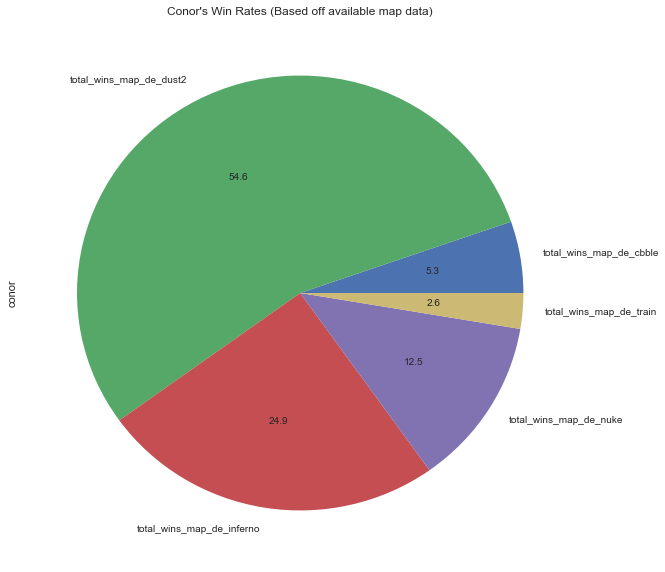

In [326]:
df_player_index.loc[ 'conor',  ['total_wins_map_de_cbble','total_wins_map_de_dust2', 
                    'total_wins_map_de_inferno',
                    'total_wins_map_de_nuke',
                    'total_wins_map_de_train']].plot.pie(autopct="%1.1f", figsize=(10, 10))
plt.title("Conor's Win Rates (Based off available map data)")

(-1.1002050435388162,
 1.1000097641991688,
 -1.1073728138075087,
 1.1208910315955194)

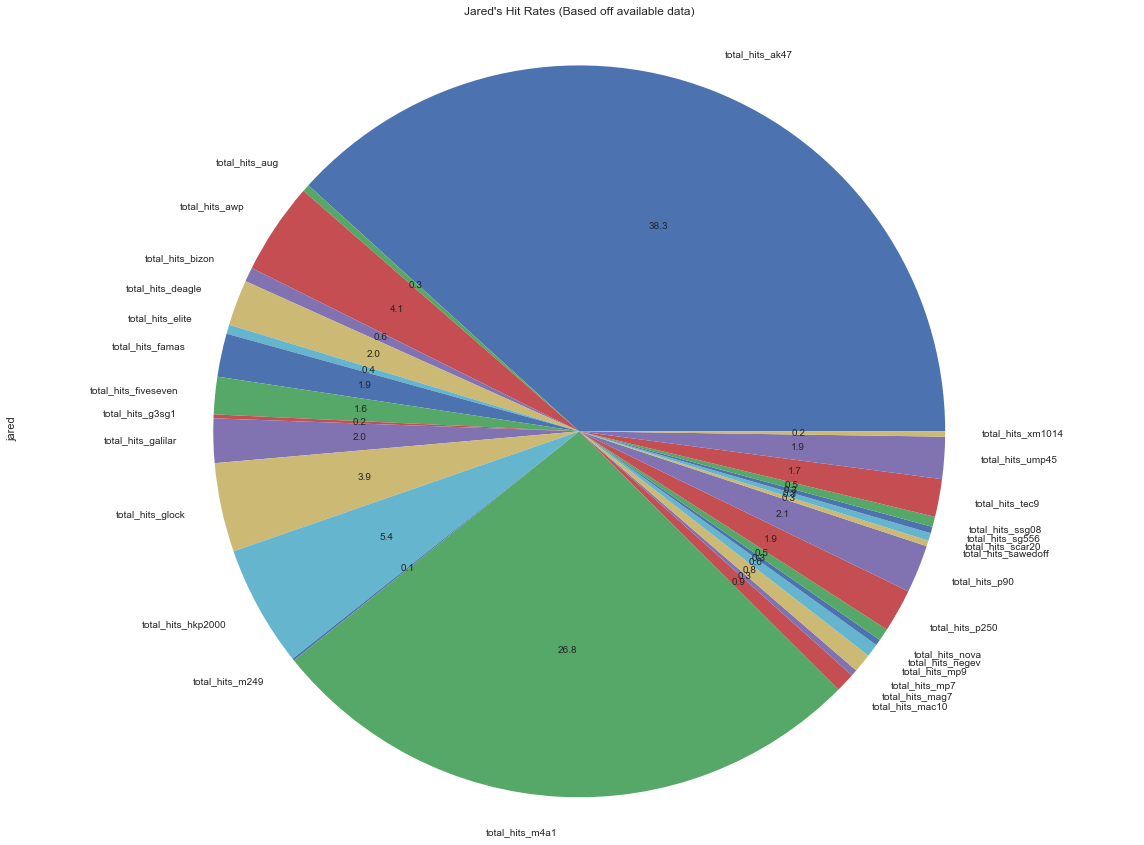

In [358]:
df_player_index.loc[ 'jared',  'total_hits_ak47':'total_hits_xm1014'].plot.pie(autopct="%1.1f", figsize=(20, 15))
plt.title("Jared's Hit Rates (Based off available data)")
plt.axis('equal')

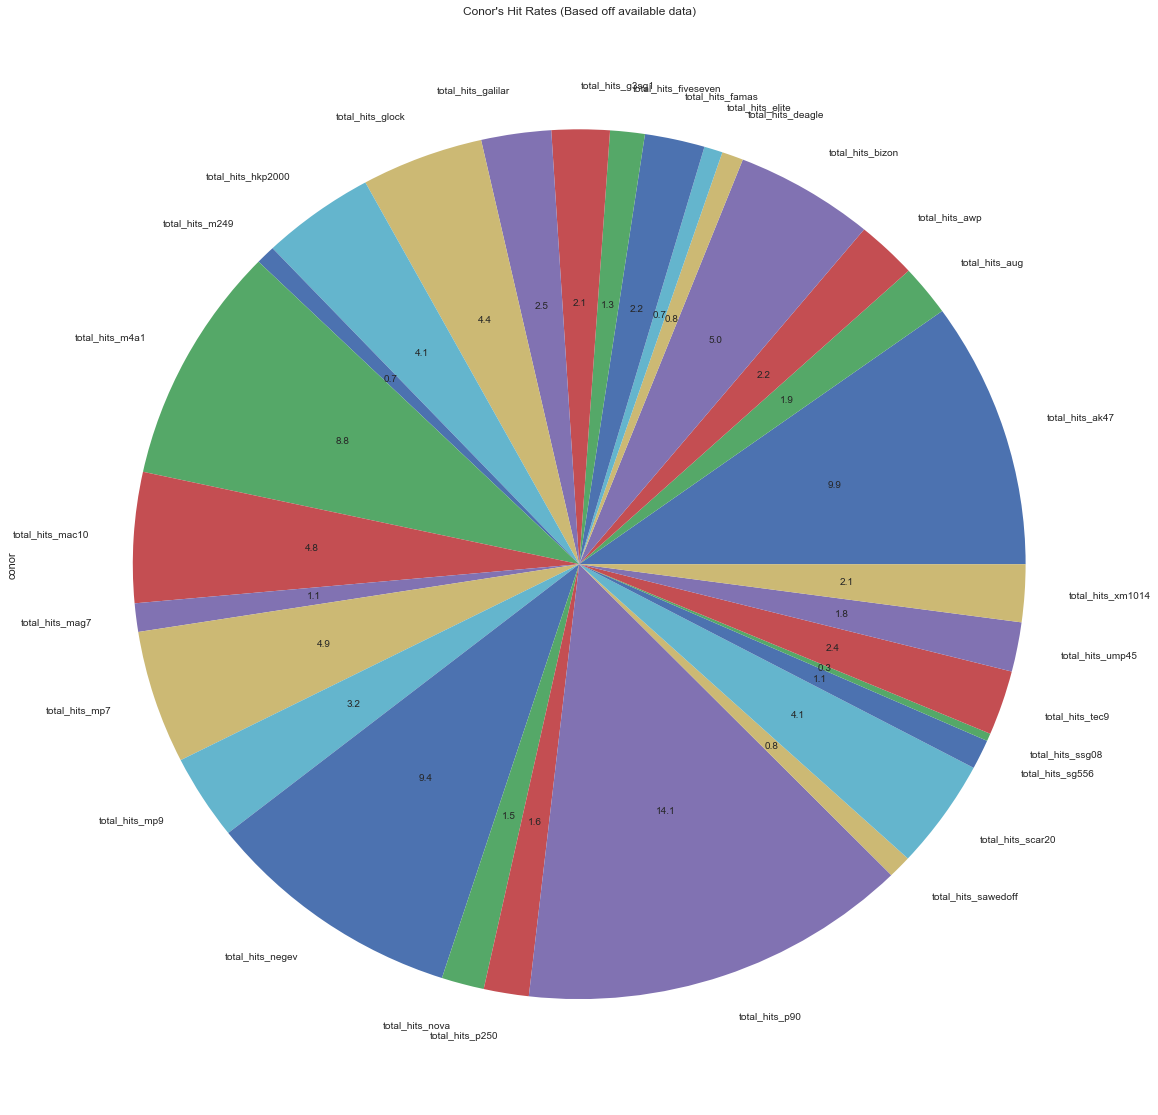

In [353]:
df_player_index.loc[ 'conor',  'total_hits_ak47':'total_hits_xm1014'].plot.pie(autopct="%1.1f", figsize=(20, 20))
plt.title("Conor's Hit Rates (Based off available data)")


In [344]:
#df2.plot.bar(stacked=True);
#len(df_player_index.loc['jared', 'total_hits_ak47':'total_hits_xm1014'])
len(df_player_index.loc['jared', 'total_shots_ak47':'total_shots_xm1014'])

32

In [377]:
 jared_shots_list= np.array(df_player_index.loc['jared', ['total_shots_ak47',
 'total_shots_aug',
 'total_shots_awp',
 'total_shots_bizon',
 'total_shots_deagle',
 'total_shots_elite',
 'total_shots_famas',
 'total_shots_fiveseven',
 'total_shots_g3sg1',
 'total_shots_galilar',
 'total_shots_glock',
 'total_shots_hkp2000',
 'total_shots_m249',
 'total_shots_m4a1',
 'total_shots_mac10',
 'total_shots_mag7',
 'total_shots_mp7',
 'total_shots_mp9',
 'total_shots_negev',
 'total_shots_nova',
 'total_shots_p250',
 'total_shots_p90',
 'total_shots_sawedoff',
 'total_shots_scar20',
 'total_shots_sg556',
 'total_shots_ssg08',
 'total_shots_tec9',
 'total_shots_ump45',
 'total_shots_xm1014']])

In [375]:
 jared_hits_list = np.array(df_player_index.loc['jared', ['total_hits_ak47',
 'total_hits_aug',
 'total_hits_awp',
 'total_hits_bizon',
 'total_hits_deagle',
 'total_hits_elite',
 'total_hits_famas',
 'total_hits_fiveseven',
 'total_hits_g3sg1',
 'total_hits_galilar',
 'total_hits_glock',
 'total_hits_hkp2000',
 'total_hits_m249',
 'total_hits_m4a1',
 'total_hits_mac10',
 'total_hits_mag7',
 'total_hits_mp7',
 'total_hits_mp9',
 'total_hits_negev',
 'total_hits_nova',
 'total_hits_p250',
 'total_hits_p90',
 'total_hits_sawedoff',
 'total_hits_scar20',
 'total_hits_sg556',
 'total_hits_ssg08',
 'total_hits_tec9',
 'total_hits_ump45',
 'total_hits_xm1014']])

In [376]:
jared_hits_list

array([79306,   676,  8397,  1309,  4200,   835,  3962,  3416,   358,
        4050,  8144, 11105,   197, 55463,  1766,   590,  1733,  1194,
         553,  1137,  3947,  4396,   532,   700,   592,   935,  3451,
        3842,   482])